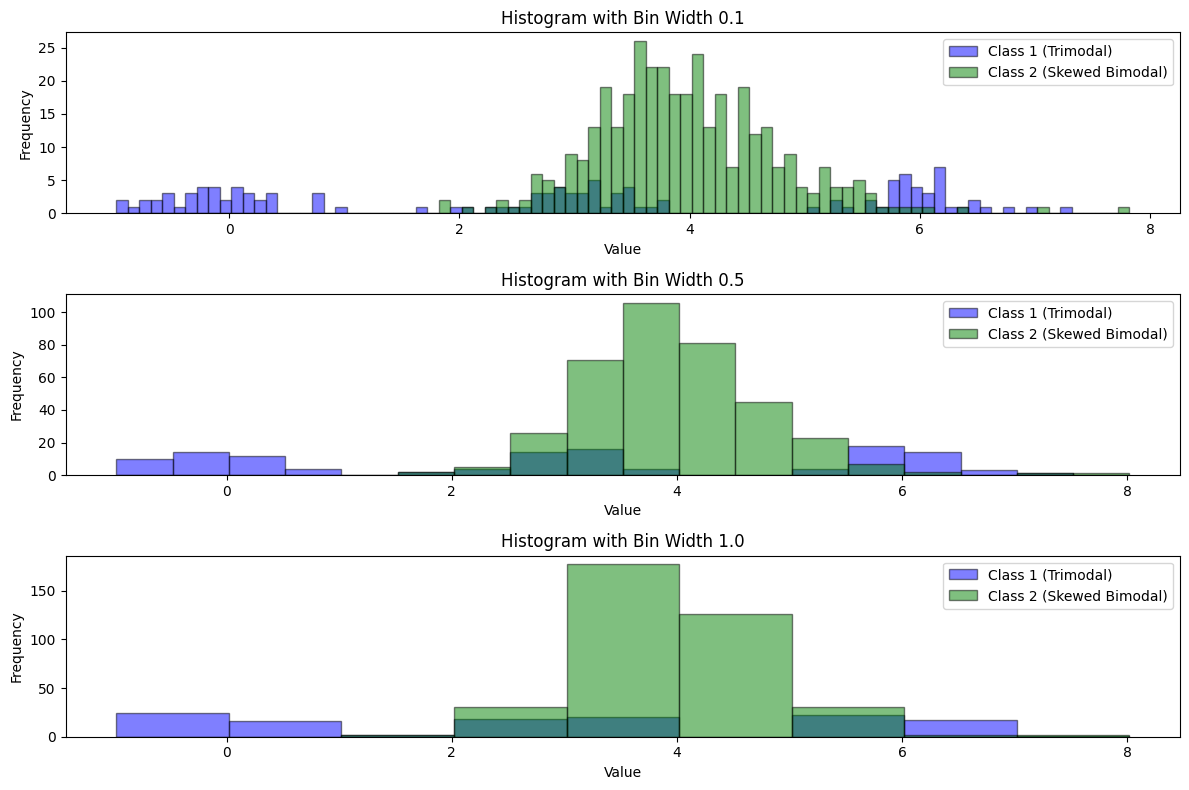

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Data

# Class 1 - Trimodal Distribution (122 samples)
class1_samples = 122
means_class1 = [0, 3, 6]  # Means of the three components
std_devs_class1 = [0.5, 0.5, 0.5]  # Standard deviations of the components
class1_data = np.concatenate([
    np.random.normal(mean, std, class1_samples // 3) for mean, std in zip(means_class1, std_devs_class1)
])

# Class 2 - Skewed Bimodal Distribution (370 samples)
class2_samples = 370
# Skewed Gaussian component for first mode
skewness_param = 5  # Controls the skewness of the distribution
skewed_data = skewnorm.rvs(a=skewness_param, loc=3, scale=1.2, size=class2_samples // 2)

# Standard Gaussian component for the second mode
bimodal_mean_class2 = 4  # Mean of the second component
bimodal_std_class2 = 0.8  # Standard deviation of the second component
bimodal_data = np.random.normal(bimodal_mean_class2, bimodal_std_class2, class2_samples // 2)

class2_data = np.concatenate([skewed_data, bimodal_data])

# Step 2: Experiment with Different Histogram Bin Widths (Pas d'Histogramme)
# Define bin widths to examine
bin_widths = [0.1, 0.5, 1.0]

# Visualize histograms for each bin width
plt.figure(figsize=(12, 8))
for i, bin_width in enumerate(bin_widths, 1):
    bins = np.arange(min(np.min(class1_data), np.min(class2_data)),
                     max(np.max(class1_data), np.max(class2_data)) + bin_width,
                     bin_width)
    plt.subplot(3, 1, i)
    plt.hist(class1_data, bins=bins, alpha=0.5, label="Class 1 (Trimodal)", color='blue', edgecolor='black')
    plt.hist(class2_data, bins=bins, alpha=0.5, label="Class 2 (Skewed Bimodal)", color='green', edgecolor='black')
    plt.title(f"Histogram with Bin Width {bin_width}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


Taille de X: (492, 16)
Taille de y: (492,)
Matrice de covariance PCA:
 [[5.31443598e+01 8.40205932e-14]
 [8.40205932e-14 1.31874406e+00]]


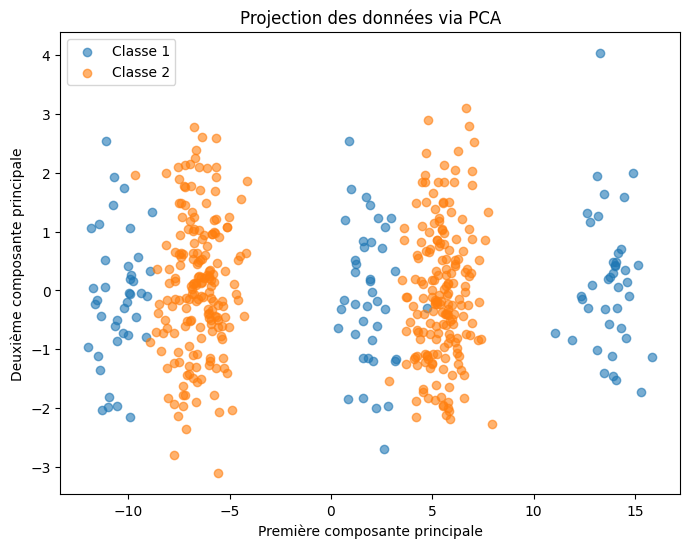

Matrice de dispersion intra-classe (Sw):
 [[2051.34267572 1532.8752817  1583.73519789 1521.16798192 1503.00219956
  1630.0702228  1621.9227315  1479.26511016 1618.3152572  1534.88750016
  1578.03917435 1646.4349638  1630.46588502 1567.00671981 1557.42722143
  1525.63097572]
 [1532.8752817  2049.44984594 1542.96841645 1546.3067     1504.86286653
  1588.62789203 1616.16126305 1449.99814329 1603.68638299 1538.72066351
  1517.10414294 1578.88509689 1608.66002804 1522.12342735 1549.94865169
  1539.59553769]
 [1583.73519789 1542.96841645 2018.90741975 1528.16956959 1505.23622121
  1663.80244017 1619.59165844 1465.49100962 1548.55898546 1551.10174258
  1552.11149955 1657.61678768 1599.25408122 1568.13275011 1543.43348568
  1566.17832194]
 [1521.16798192 1546.3067     1528.16956959 2033.75872138 1452.45015573
  1633.67123313 1581.19816608 1501.54877829 1598.38469699 1523.46996844
  1583.42136155 1605.63234689 1587.14947599 1547.68790846 1543.89715441
  1587.73236371]
 [1503.00219956 1504.86286

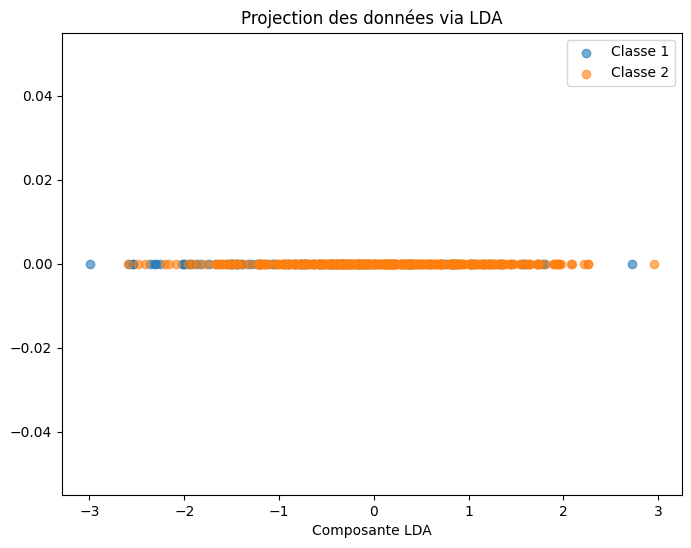

Score silhouette pour LDA: 0.11211919302085119


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import silhouette_score

# Fixer les paramètres
np.random.seed(42)

# Re-générer les données avec exactement 490 échantillons
# Classe 1: trimodale, 122 échantillons
mean1 = [2]*16
mean2 = [5]*16
mean3 = [8]*16
cov = np.identity(16)

class1_part1 = np.random.multivariate_normal(mean1, cov, 41)
class1_part2 = np.random.multivariate_normal(mean2, cov, 41)
class1_part3 = np.random.multivariate_normal(mean3, cov, 40)
class1_data = np.vstack([class1_part1, class1_part2, class1_part3])

# Classe 2: bimodale, 370 échantillons avec un biais pour introduire l'asymétrie
mean4 = [3]*16
mean5 = [6]*16
class2_part1 = np.random.multivariate_normal(mean4, cov, 185)
class2_part2 = np.random.multivariate_normal(mean5, cov, 185)
class2_data = np.vstack([class2_part1, class2_part2])

# Concaténer les données des deux classes
X = np.vstack([class1_data, class2_data])
y = np.array([0]*122 + [1]*370)

# Vérification des tailles
print("Taille de X:", X.shape)
print("Taille de y:", y.shape)

# Étape de PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualiser la matrice de covariance de PCA
cov_matrix_pca = np.cov(X_pca.T)
print("Matrice de covariance PCA:\n", cov_matrix_pca)

# Visualisation des données projetées en 2D via PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label="Classe 1", alpha=0.6)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label="Classe 2", alpha=0.6)
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.title("Projection des données via PCA")
plt.legend()
plt.show()

# Calcul manuel des matrices de dispersion pour LDA
# Calcul du Sw (matrice de dispersion intra-classe)
mean_total = np.mean(X, axis=0)
Sw = np.zeros((16, 16))
for label in np.unique(y):
    X_class = X[y == label]
    mean_class = np.mean(X_class, axis=0)
    Sw += np.dot((X_class - mean_class).T, (X_class - mean_class))

# Calcul du Sb (matrice de dispersion inter-classe)
Sb = np.zeros((16, 16))
for label in np.unique(y):
    X_class = X[y == label]
    mean_class = np.mean(X_class, axis=0)
    n_class = X_class.shape[0]
    mean_diff = (mean_class - mean_total).reshape(-1, 1)
    Sb += n_class * np.dot(mean_diff, mean_diff.T)

print("Matrice de dispersion intra-classe (Sw):\n", Sw)
print("Matrice de dispersion inter-classe (Sb):\n", Sb)

# Étape de LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Visualisation des données projetées en 2D via LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[y == 0], [0]*len(X_lda[y == 0]), label="Classe 1", alpha=0.6)
plt.scatter(X_lda[y == 1], [0]*len(X_lda[y == 1]), label="Classe 2", alpha=0.6)
plt.xlabel("Composante LDA")
plt.title("Projection des données via LDA")
plt.legend()
plt.show()

# Calcul du score silhouette pour LDA
silhouette_lda = silhouette_score(X_lda, y)
print("Score silhouette pour LDA:", silhouette_lda)


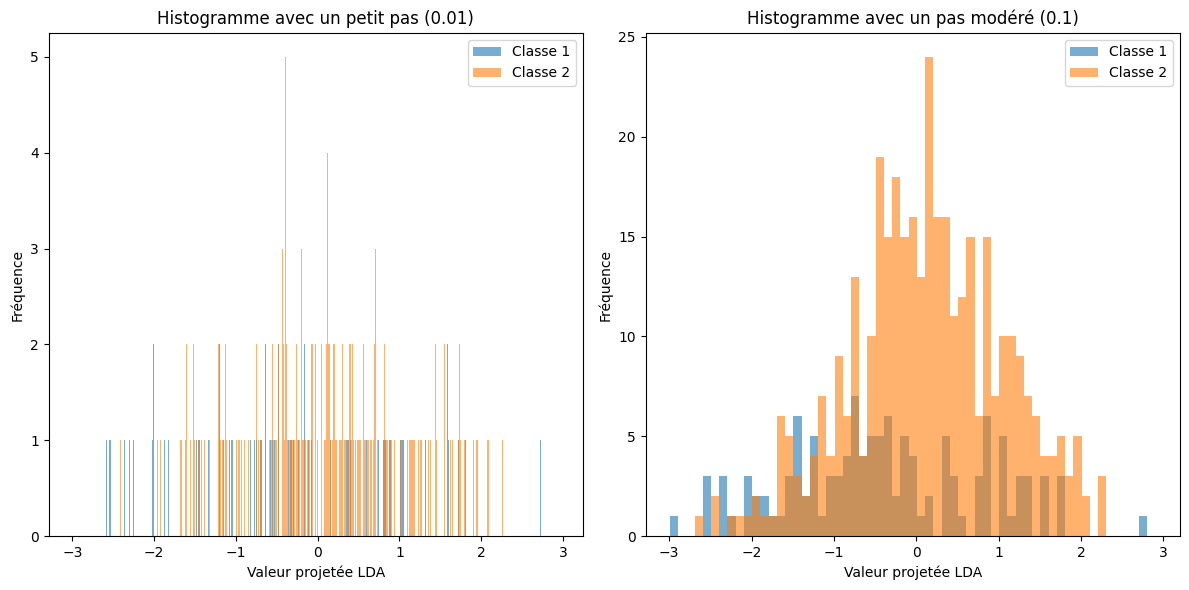

In [7]:
import matplotlib.pyplot as plt

# Tracé des données projetées dans l'espace 1D de LDA
plt.figure(figsize=(12, 6))

# 1. Histogramme avec un petit "pas" (bin size = 0.01)
plt.subplot(1, 2, 1)
plt.hist(X_lda[y == 0], bins=np.arange(X_lda.min(), X_lda.max(), 0.006), alpha=0.6, label="Classe 1")
plt.hist(X_lda[y == 1], bins=np.arange(X_lda.min(), X_lda.max(), 0.006), alpha=0.6, label="Classe 2")
plt.xlabel("Valeur projetée LDA")
plt.ylabel("Fréquence")
plt.title("Histogramme avec un petit pas (0.01)")
plt.legend()

# 2. Histogramme avec un "pas" modéré (bin size = 0.1)
plt.subplot(1, 2, 2)
plt.hist(X_lda[y == 0], bins=np.arange(X_lda.min(), X_lda.max(), 0.1), alpha=0.6, label="Classe 1")
plt.hist(X_lda[y == 1], bins=np.arange(X_lda.min(), X_lda.max(), 0.1), alpha=0.6, label="Classe 2")
plt.xlabel("Valeur projetée LDA")
plt.ylabel("Fréquence")
plt.title("Histogramme avec un pas modéré (0.1)")
plt.legend()

plt.tight_layout()
plt.show()
